In [ ]:
#@title Packages

## General
import os
from pathlib import Path
import pickle

## Data Analysis 
import pandas as pd
import numpy as np

## Torch Specific
# !pip install torchvision
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader



In [ ]:
#@title Install Dependencies

'''
From Tutorial:
https://www.learnpytorch.io/06_pytorch_transfer_learning/
'''


# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine


## Plot Loss Curves
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:


train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
!pip install --upgrade torchvision

In [ ]:
# Create a transforms pipeline AUTOMATICALLY (using torchvision.models.resnet50())

batch_size = 32

# Get a set of pretrained model weights
weights = torchvision.models.ResNet50_Weights.DEFAULT.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet

# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()

# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size = batch_size) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f6526d9d190>,
 ['bird', 'dog', 'reptile'])

In [ ]:
# import model
model = torchvision.models.resnet50(weights=weights).to(device)

# examine
batch_size = 32
# batch_size = 20

# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(batch_size, 3, 224, 224), # above we let it automatically reshape our data, which I beleive is to 224x224 
                                              # (found in train_dataloader.dataset, as the 'crop_size')
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

In [ ]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
'''
Source: https://discuss.pytorch.org/t/when-freeze-layers-of-resnet50-pretrained-are-there-total-10-layers-to-freeze/162071
'''
for child in model.children():
    for param in child.parameters():
        param.requires_grad = False



In [ ]:
# change output structure (only have 3 classes here, not 1000)

'''
details can be found using "model.fc" command
source: https://discuss.pytorch.org/t/modify-resnet50-to-give-multiple-outputs/46905/2
'''
in_ftrs = model.fc.in_features
out_fts = 3
model.fc = nn.Linear(in_ftrs, out_fts)

# output summary again to ensure we good
# examine
batch_size = 32
# batch_size = 20

# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(batch_size, 3, 224, 224), # above we let it automatically reshape our data, which I beleive is to 224x224 
                                              # (found in train_dataloader.dataset, as the 'crop_size')
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)



Param Combo -> lr: 0.001, num_epochs: 40


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1157 | train_acc: 0.3451 | test_loss: 1.0695 | test_acc: 0.4255
Epoch: 2 | train_loss: 1.0902 | train_acc: 0.3830 | test_loss: 1.0476 | test_acc: 0.4704
Epoch: 3 | train_loss: 1.0727 | train_acc: 0.4146 | test_loss: 1.0314 | test_acc: 0.4868
Epoch: 4 | train_loss: 1.0618 | train_acc: 0.4381 | test_loss: 1.0111 | test_acc: 0.5239
Epoch: 5 | train_loss: 1.0494 | train_acc: 0.4540 | test_loss: 1.0205 | test_acc: 0.4849
Epoch: 6 | train_loss: 1.0444 | train_acc: 0.4527 | test_loss: 0.9882 | test_acc: 0.5283
Epoch: 7 | train_loss: 1.0288 | train_acc: 0.4657 | test_loss: 0.9806 | test_acc: 0.5385
Epoch: 8 | train_loss: 1.0271 | train_acc: 0.4695 | test_loss: 0.9784 | test_acc: 0.5271
Epoch: 9 | train_loss: 1.0240 | train_acc: 0.4754 | test_loss: 0.9651 | test_acc: 0.5496
Epoch: 10 | train_loss: 1.0160 | train_acc: 0.4837 | test_loss: 0.9616 | test_acc: 0.5326
Epoch: 11 | train_loss: 1.0167 | train_acc: 0.4817 | test_loss: 0.9529 | test_acc: 0.5676
Epoch: 12 | train_l

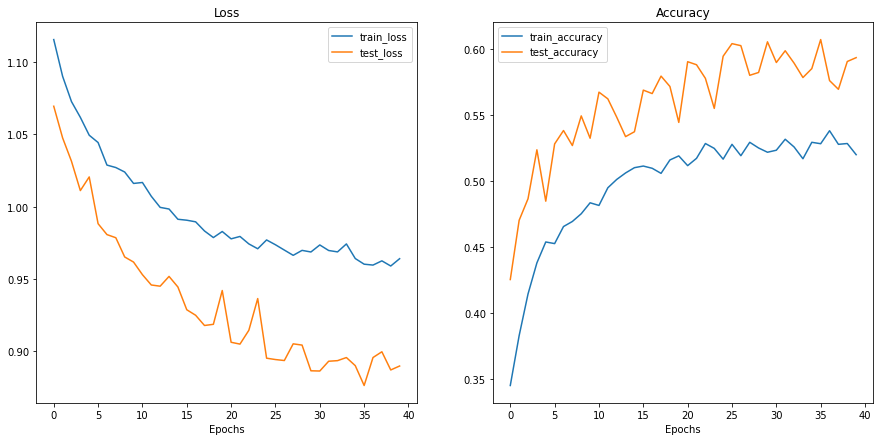

In [ ]:
# training call
batch_size = 32
learning_rate = 0.0005
epochs = 40


# Get a set of pretrained model weights
weights = torchvision.models.ResNet50_Weights.DEFAULT.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet

# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()

# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                            test_dir=test_dir,
                                                                            transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                            batch_size = batch_size) # set mini-batch size to 32

# import model
model = torchvision.models.resnet50(weights=weights).to(device)


# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
'''
Source: https://discuss.pytorch.org/t/when-freeze-layers-of-resnet50-pretrained-are-there-total-10-layers-to-freeze/162071
'''
for child in model.children():
    for param in child.parameters():
        param.requires_grad = False


# change output structure (only have 3 classes here, not 1000)
'''
details can be found using "model.fc" command
source: https://discuss.pytorch.org/t/modify-resnet50-to-give-multiple-outputs/46905/2
'''
in_ftrs = model.fc.in_features
out_fts = 3
model.fc = nn.Linear(in_ftrs, out_fts)

# INFO
print(f'Param Combo -> lr: {learning_rate}, num_epochs: {epochs}')

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                    train_dataloader=train_dataloader,
                    test_dataloader=test_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=epochs,
                    device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

# print 
best_acc = max(results['test_acc'])
print(f'Best training Accuracy: {best_acc}')

# Plot the loss curves of our model
plot_loss_curves(results)
print('\n')


In [ ]:
def test_model(model, testloader):
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.inference_mode():
      for data in testloader:
          images, labels = data[0].to(device), data[1].to(device)
          # calculate outputs by running images through the network
          outputs = model(images)
          #print(outputs.data)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on test images: {100 * correct // total} %')

test_model(model, test_dataloader)

Accuracy of the network on test images: 59 %


In [ ]:
# now try from scratch! (load that mf in)

# path
PATH = '/content/jason/resnet_tesss.pth'

# Load
LOADED_model = torchvision.models.resnet50()

## slight modifications
in_ftrs = LOADED_model.fc.in_features
out_fts = 3
LOADED_model.fc = nn.Linear(in_ftrs, out_fts)

# load in MY weights
LOADED_model.load_state_dict(torch.load(PATH))
LOADED_model.eval()

# switch to cuda
if torch.cuda.is_available():
    LOADED_model.cuda()


test_model(LOADED_model, test_dataloader)

Accuracy of the network on test images: 59 %
